In [2]:
import pandas as pd
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import time
from operator import itemgetter

In [5]:
data = pd.read_csv('data/rec-amz-Books.edges', header=None)

In [6]:
data

,0,1,2,3
0,AH2L9G3DQHHAJ,0000000116,4.0,1019865600
1,A2IIIDRK3PRRZY,0000000116,1.0,1395619200
2,A1TADCM7YWPQ8M,0000000868,4.0,1031702400
3,AWGH7V0BDOJKB,0000013714,4.0,1383177600
4,A3UTQPQPM4TQO0,0000013714,5.0,1374883200
...,...,...,...,...
22507150,A20KO0BPMNREJL,B00M13FNSS,5.0,1406073600
22507151,A1BQO66R6OLCCW,B00M13FNSS,5.0,1406073600
22507152,A1CI87FHKK6HVC,B00M13FNSS,5.0,1406073600
22507153,A8W4BR3HGGS3C,B00M13FNSS,5.0,1406073600


In [7]:
#prvych n riadkov....
n = 20000
data_sample = data.iloc[:n,0:3]
B = nx.Graph()
B.add_nodes_from(data_sample[0], bipartite=0)
B.add_nodes_from(data_sample[1],bipartite=1)
B.add_weighted_edges_from(data_sample.apply(tuple, axis=1))

In [8]:
bipartite.is_bipartite(B)

True

In [9]:
#nx.draw(B, nx.bipartite_layout(B, data_sample[0]))

In [10]:
#z bipartitneho vytvorime 2 projekcie
G_rec = bipartite.projected_graph(B, data_sample[0])
G_knihy = bipartite.projected_graph(B, data_sample[1])

In [11]:
#kompletnost grafu, hustota
print("hustota recenzentov:", nx.density(G_rec))
print("hustota knih:", nx.density(G_knihy))

hustota recenzentov: 0.21269450433030873
hustota knih: 0.0014285348931521663


In [12]:
#najrecenzovanejšie knihy z prvých 20 tisic recenzií
data.iloc[:n,1:2].value_counts().head(10)

1         
0002247399    6473
0002007770    6001
0002242052     563
000100039X     536
0002051850     426
000224053X     404
0002219417     291
000612609X     184
0002185385     184
000616823X     121
dtype: int64

Aka je najkratšia cesta medzi 2ma vrcholmi?
Treba vymyslieť otázku aké 2 knihy by nás zaujímali, lebo väčšina populárnych kníh sú automaticky susedmi

In [13]:
path1 = nx.shortest_path(G_knihy, source="0002247399", target="0002007770")
print("Shortest path:", path1)

Shortest path: ['0002247399', '0002007770']


In [14]:
#je graf jeden komponent?
print("je bipartitný graf, pôvodný graf, 1 komponent? :",  nx.is_connected(B))
print("------------")
print("je graf recenzorov 1 komponent? : ",  nx.is_connected(G_rec))
print("je graf kníh 1 komponent? : ",  nx.is_connected(G_knihy))

je bipartitný graf, pôvodný graf, 1 komponent? : False
------------
je graf recenzorov 1 komponent? :  False
je graf kníh 1 komponent? :  False


In [15]:
komponenty_knih = nx.connected_components(G_knihy)
najvacsi_kom_knih = max(komponenty_knih, key=len)
G_knihy_najvacsi_kom = G_knihy.subgraph(najvacsi_kom_knih)
print("diameter najvacsieho komponentu knih:", nx.diameter(G_knihy_najvacsi_kom))

#trva dlhsie
#komponenty_rec = nx.connected_components(G_rec)
#najvacsi_kom_rec = max(komponenty_rec, key=len)
#G_rec_najvacsi_kom = G_rec.subgraph(najvacsi_kom_rec)
#print("diameter najvacsieho komponentu recenzentov:", nx.diameter(G_rec_najvacsi_kom))

diameter najvacsieho komponentu knih: 11


In [16]:
#zhlukovy koeficient, triadic closure, clustering coefficient

print("zhlukovy koeficient knih:", nx.transitivity(G_knihy))

#trva dlho
#print("zhlukovy koeficient recenzentov:", nx.transitivity(G_rec))

zhlukovy koeficient knih: 0.6057656995960338


Na prednáške sme brali tieto typy centralít:
eigenvector, katz, pagerank, closeness, betweenness

Networkx ponúka okrem tých vyššie ešte aj:
degree, hubs and authorities, prestige

Zatiaľ som spravila:
degree, betweenness, eigenvectors

In [17]:
#1. typ centrality - degree
stupne_knih = dict(G_knihy.degree(G_knihy.nodes()))
nx.set_node_attributes(G_knihy, stupne_knih, 'degree')
sorted_stupne_knih = sorted(stupne_knih.items(), key=itemgetter(1), reverse=True)
print(sorted_stupne_knih[:15])

[('0002007770', 48), ('0002051850', 43), ('000224053X', 38), ('0006158048', 34), ('0002726874', 30), ('0006161413', 29), ('000215725X', 28), ('0002247399', 28), ('000616174X', 26), ('000615591X', 25), ('0002318075', 22), ('0006128149', 22), ('0006129226', 22), ('0006130801', 22), ('0006131247', 22)]


In [18]:
#2.typ centrality - betweenness
eigenvector_knihy = nx.eigenvector_centrality(G_knihy)
sorted_eigenvector_knihy = sorted(eigenvector_knihy.items(), key=itemgetter(1), reverse=True)
print(sorted_eigenvector_knihy[:15])

[('000215725X', 0.21177717414624841), ('0006128149', 0.20818724687699625), ('0006129226', 0.20818724687699625), ('0006130801', 0.20818724687699625), ('0006131247', 0.20818724687699625), ('0006131255', 0.20818724687699625), ('0006132480', 0.20818724687699625), ('0006132499', 0.20818724687699625), ('0006136230', 0.20818724687699625), ('0006136966', 0.20818724687699625), ('0006137008', 0.20818724687699625), ('0006139264', 0.20818724687699625), ('0006140904', 0.20818724687699625), ('0006149006', 0.20818724687699625), ('0006154042', 0.20818724687699625)]


In [19]:
#3.  typ centrality - eigenvector
betweenness_knihy = nx.betweenness_centrality(G_knihy)
sorted_betweenness_knihy = sorted(betweenness_knihy.items(), key=itemgetter(1), reverse=True)
print(sorted_betweenness_knihy[:15])

[('0002007770', 0.011294441911703245), ('0002247399', 0.008553425494466783), ('0002051850', 0.0070351878060485856), ('000215725X', 0.007015526298763531), ('000224053X', 0.006049995453090213), ('0002550296', 0.005621218774395004), ('0002726874', 0.004330338039682276), ('000215949X', 0.003861119242779079), ('000615591X', 0.003855195003331867), ('000222383X', 0.0037036797147610785), ('000100039X', 0.002992049813064985), ('0002152134', 0.002898126463700234), ('0006171044', 0.0024346220980866573), ('000612609X', 0.0023190300476222544), ('0002154463', 0.0022894711163153787)]


Modularita

In [20]:
modularity = community.modularity(G_knihy, nx.connected_components(G_knihy))

In [21]:
communities = community.greedy_modularity_communities(G_knihy)

Projekcna matica - algoritmus

In [22]:
import numpy as np
from numba import jit

In [23]:
# matica knih, bezvahova
A=bipartite.biadjacency_matrix(B, data_sample[1].unique(), weight=None).todense()

# samotny algoritmus
@jit(nopython=True)
def proj(B_graph):
    n1 = B_graph.shape[0]
    n2 = B_graph.shape[1]
    A_pr = np.zeros((n1,n1))
    for i in range(n1):
        for j in range(i+1, n1):
            for k in range(n2):
                if B_graph[i][k] == 1 and B_graph[j][k] == 1:
                    A_pr[i][j] = 1
                    A_pr[j][i] = 1
                else:
                    A_pr[i][j] = 0
    return A_pr
A_p = proj(A)

# pisanie do suboru
books = data_sample[1].unique()
f = open("projection.edges", "a")
for i in range(len(A_p)):
    for j in range(len(A_p)):
        if A_p[i][j] == 1:
            f.write(f'{books[i]},{books[j]}\n')
f.close()

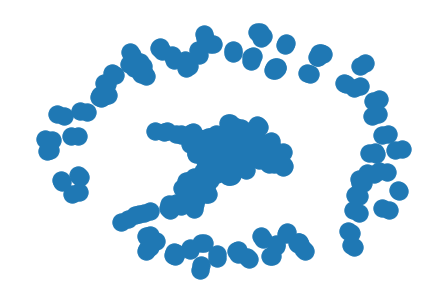

In [24]:
# citanie napisaneho
# toto by malo byt to iste ako G_knihy

B_test=nx.read_edgelist("projection.edges", nodetype=str, delimiter=',')
pos = nx.spring_layout(B_test)
nx.draw(B_test, pos=pos)